<center>Course: Advanced Machine Learning <br>
Lecturer: Sothea HAS, PhD
</center>

-----
# **TP1 - Naive Bayes Classifier / Linear, Quadratic and Regularized Discriminant Analysis**

-----

<div class="alert alert-block alert-success">
<b>Objective:</b> This TP aims to familiarize you with the key assumptions of each introduced model. You will go through the following sections:

1. Model Assumptions and Data Simulation: It's important to verify that any models should work well on the data that respect their assumptions. It's the goal of this part.

- *Data Simulation*: Create datasets that either respect or violate the assumptions of each model, including addressing imbalance problems.
- *Model Implementation*: Put the models into action.
- *Model Evaluation*: Report the performance of the models using appropriate metrics.

2. Real Data Implementation: In real-world problems, things are more complicated because very often the assumptions of the model are often violated. We shall see this by going through the following points.

- *Import Real Datasets*: Use the `Spam` and `MNIST` datasets.
- *Preprocessing/Descriptive Analysis*: Understand the features and verify the assumptions.
- *Implementation*: Apply the models to the real datasets.
- *Evaluation*: Assess the performance of the models.
</div>

## **1. Simulation**
- Write the function `simulateClassificationData(n=200, d=2, M = 2, method = "nbc")` that returns a design matrix of observations with 
    - observation size `n` ($200$ by default)
    - input $x_i$ are of dimension `d` ($2$ by default)
    - the target $y$ contains `M` classes taking values in $\{1,2,\dots,M\}$
    - and lastly, `method` defines the prefered method to use with the generated data among [`nbc`, `LDA`, `QDA`, `RDA`] (`nbc` by default).

This can be done very easily with the help of `make_classification` module from `sklearn.datasets`.

In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_spd_matrix

def simulateClassificationData(n=200, d=2, M=2, method="nbc", class_weights = None):
    """
    Generates a design matrix for classification that works well with Naive Bayes.
    
    Parameters:
    n (int): Number of samples.
    d (int): Number of features.
    M (int): Number of classes.
    method (str): Method name, default is "nbc" (Naive Bayes Classification).
    class_weights (arr): The proportion of each class. If `None`, the data is balanced.
    random_state (int): Random seed for repreoducing the result in random simulation.
    
    Returns:
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Labels.
    """

    if class_weights is None:
        class_weights = np.ones(M)/M

    if method == "nbc":
    
        # Generate a random classification problem
        X, y = make_classification(n_samples=n, 
                                n_features=d, 
                                n_informative=d, 
                                n_redundant=0, 
                                n_clusters_per_class=1, 
                                n_classes=M, 
                                weights=class_weights)
        y = np.array([str(j+1) for j in y])
    elif method == "lda":
        # generate parameters (means & covariances)
        mu = np.random.uniform(-5, 5, size=d)
        sigma0 = make_spd_matrix(n_dim=d)
        for i in range(M-1):
            mu = np.row_stack([mu, np.random.uniform(-5, 5, size=d)])
            
        # generate observations
        X = np.row_stack([np.random.multivariate_normal(mean=mu[i,:], cov=sigma0, size=int(n*class_weights[i])) for i in range(M)])
        y = np.concatenate([np.repeat(str(i), int(n*class_weights[i-1])) for i in range(1,M+1)])

    elif method in ["qda", "rda"]:
        # generate parameters (means & covariances)
        mu = np.random.uniform(-5, 5, size=d)
        sigma = [make_spd_matrix(n_dim=d)]
        for i in range(M-1):
            mu = np.row_stack([mu, np.random.uniform(-5, 5, size=d)])
            sigma.append(make_spd_matrix(n_dim=d))
        # generate observations
        X = np.row_stack([np.random.multivariate_normal(mean=mu[i,:], cov=sigma[i], size=int(n*class_weights[i])) for i in range(M)])
        y = np.concatenate([np.repeat(str(i), int(n*class_weights[i-1])) for i in range(1,M+1)])
    else:
        ValueError("method is either 'nbc', 'lda', 'qda' or 'rda'!")
    id_shuffle = np.random.permutation(range(len(y)))
    return X[id_shuffle,:], y[id_shuffle]


-------
#### A. Balanced datasets
a. With $(n,d,M)=(500,2,3)$, generate datasets: `(X_nbc,y_nbc)`, `(X_lda,y_lda)` and `(X_qda,y_qda)` using the function above with the corresponding `method`.

In [64]:
n, d, M = 500, 2, 3
np.random.seed(42)
X_nbc, y_nbc = simulateClassificationData(n, d, M, method="nbc")
X_lda, y_lda = simulateClassificationData(n, d, M, method="lda")
X_qda, y_qda = simulateClassificationData(n, d, M, method="qda")

b. Visualize scatter plots of the three datasets with points colored by the target $y$.

<Axes: >

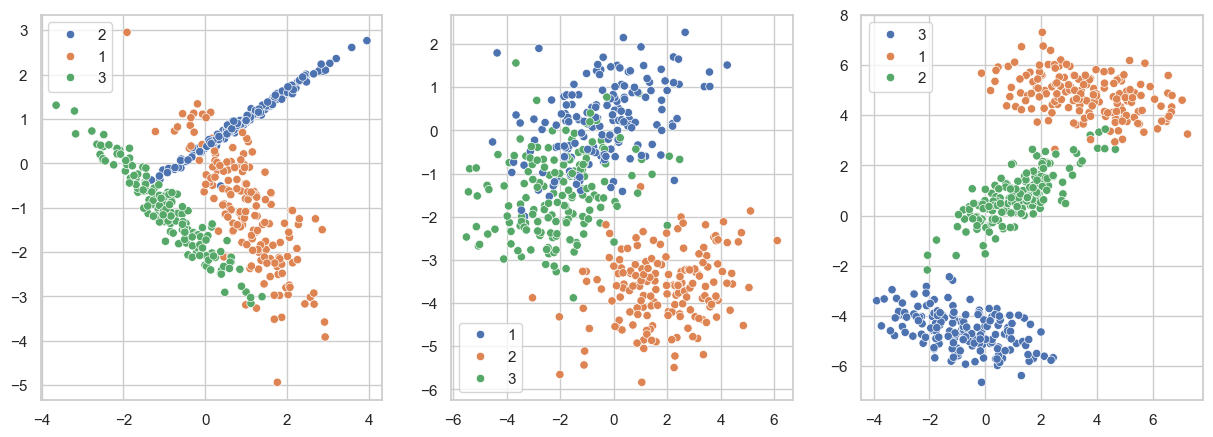

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.scatterplot(x=X_nbc[:,0], y=X_nbc[:,1], hue=y_nbc, ax=ax[0])
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y_lda, ax=ax[1])
sns.scatterplot(x=X_qda[:,0], y=X_qda[:,1], hue=y_qda, ax=ax[2])

b. Train NBC, LDA or QDA on each of the three datasets. 

In [43]:
# To do